## Trees, Ensembles and XGBoost

    -- Introduction
    -- How they work?
    -- What are Trees useful for?

## Imports and initialization

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]


## Data Preparation

In [11]:
data = pd.read_csv('data/gdp_uk.csv')

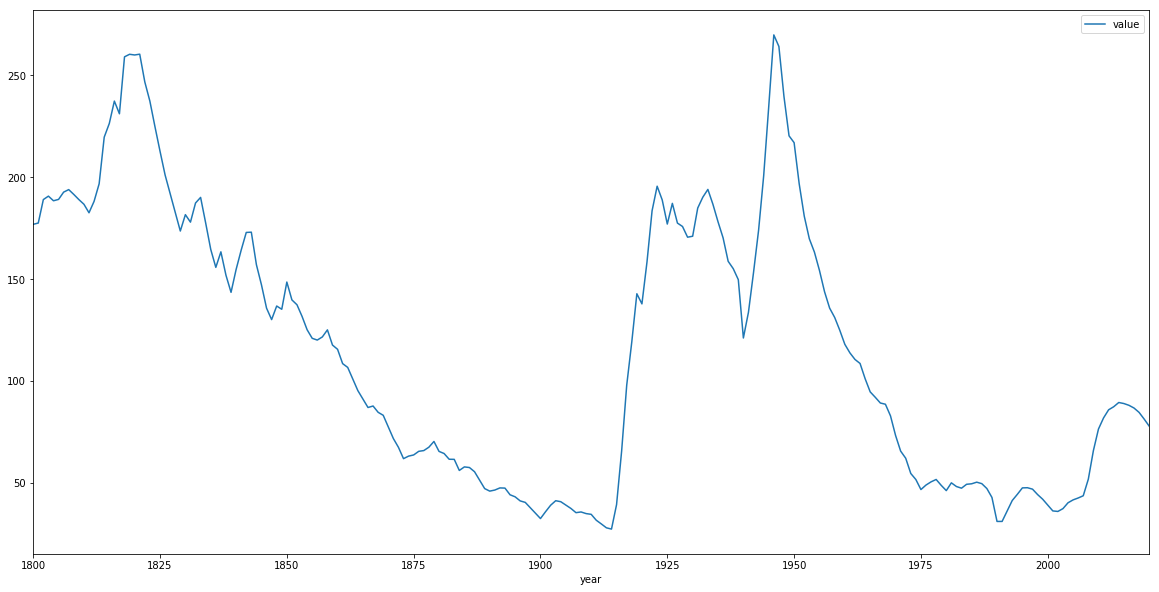

In [12]:
data[['year', 'value']].plot(x='year', y='value')

In [13]:
data['gdp_growth'] = np.log(data.value / data.value.shift(1))
data['is_inc'] = np.where(data.value / data.value.shift(1) > 1, 1, 0)

In [16]:
data.head(10)

,Unnamed: 0,Country Name,Country Code,Indicator Name,Indicator Code,Attribute,year,value,gdp_growth,is_inc
0,138,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1800,176.84,NaN,0
1,327,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1801,177.47,0.003556,1
2,516,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1802,188.99,0.062893,1
3,705,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1803,190.67,0.008850,1
4,894,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1804,188.40,-0.011977,0
5,1083,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1805,189.07,0.003550,1
6,1272,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1806,192.64,0.018706,1
7,1461,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1807,193.88,0.006416,1
8,1650,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1808,191.51,-0.012299,0
9,1839,United Kingdom,112,Debt to GDP Ratio,GGXWDG_GDP,Value,1809,188.99,-0.013246,0


In [17]:
for lag in range(1, 6):
    data[f'gdp_growth_lag_{lag}'] = data['gdp_growth'].shift(lag)

In [18]:
data.dropna(inplace=True)

In [19]:
df = data[['year', 
         'gdp_growth_lag_1', 
         'gdp_growth_lag_2',
         'gdp_growth_lag_3',
         'gdp_growth_lag_4',
         'gdp_growth_lag_5',
         'gdp_growth',
         'is_inc']].copy()

In [20]:
df.head(10)

,year,gdp_growth_lag_1,gdp_growth_lag_2,gdp_growth_lag_3,gdp_growth_lag_4,gdp_growth_lag_5,gdp_growth,is_inc
6,1806,0.003550,-0.011977,0.008850,0.062893,0.003556,0.018706,1
7,1807,0.018706,0.003550,-0.011977,0.008850,0.062893,0.006416,1
8,1808,0.006416,0.018706,0.003550,-0.011977,0.008850,-0.012299,0
9,1809,-0.012299,0.006416,0.018706,0.003550,-0.011977,-0.013246,0
10,1810,-0.013246,-0.012299,0.006416,0.018706,0.003550,-0.012245,0
11,1811,-0.012245,-0.013246,-0.012299,0.006416,0.018706,-0.022645,0
12,1812,-0.022645,-0.012245,-0.013246,-0.012299,0.006416,0.030222,1
13,1813,0.030222,-0.022645,-0.012245,-0.013246,-0.012299,0.044856,1
14,1814,0.044856,0.030222,-0.022645,-0.012245,-0.013246,0.110016,1
15,1815,0.110016,0.044856,0.030222,-0.022645,-0.012245,0.030007,1


In [21]:
features_columns = ['gdp_growth_lag_1', 'gdp_growth_lag_2','gdp_growth_lag_3', 'gdp_growth_lag_4', 'gdp_growth_lag_5']
target = 'is_inc'

## Trees & XGBoost

In [44]:
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [58]:
model = xgb.XGBClassifier(max_depth=5)
# model = RandomForestClassifier(n_estimators=20, max_depth=5)
# model = DecisionTreeClassifier(max_depth=5)

## Train

In [59]:
train_df = df[df.year < 1990].copy()
test_df = df[df.year >= 1990].copy()

In [60]:
model.fit(train_df[features_columns], train_df[target])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [64]:
model.feature_importances_

array([0.303051  , 0.17392063, 0.17913273, 0.18450804, 0.15938754],
      dtype=float32)

## Test

In [48]:
df['is_inc_pred'] = model.predict(df[features_columns])
test_df['is_inc_pred'] = model.predict(test_df[features_columns])

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(test_df['is_inc'], test_df['is_inc_pred'])

0.8064516129032258

In [51]:
accuracy_score(df['is_inc'], df['is_inc_pred'])

0.8558139534883721

## Regressor

In [52]:
model = xgb.XGBRegressor()

In [53]:
dir(model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_estimator_type',
 '_get_param_names',
 'apply',
 'base_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'importance_type',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max_delta_step',
 'max_depth',
 'min_child_weight',
 'missing',
 'n_estimators',
 'n_jobs',
 'nthread',
 'objective',
 'predict',
 'random_state',
 'reg_alpha',
 'reg_lambda',
 'save_model',
 'scale_pos_weight',


In [54]:
model.fit(train_df[features_columns], train_df['gdp_growth']) 

[18:53:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/miniconda3/lib/python3.7/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
/miniconda3/lib/python3.7/site-packages/xgboost/core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0,
       importance_type='gain', learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

In [55]:
df['gdp_growth_pred'] = model.predict(df[features_columns])
test_df['gdp_growth_pred'] = model.predict(test_df[features_columns])

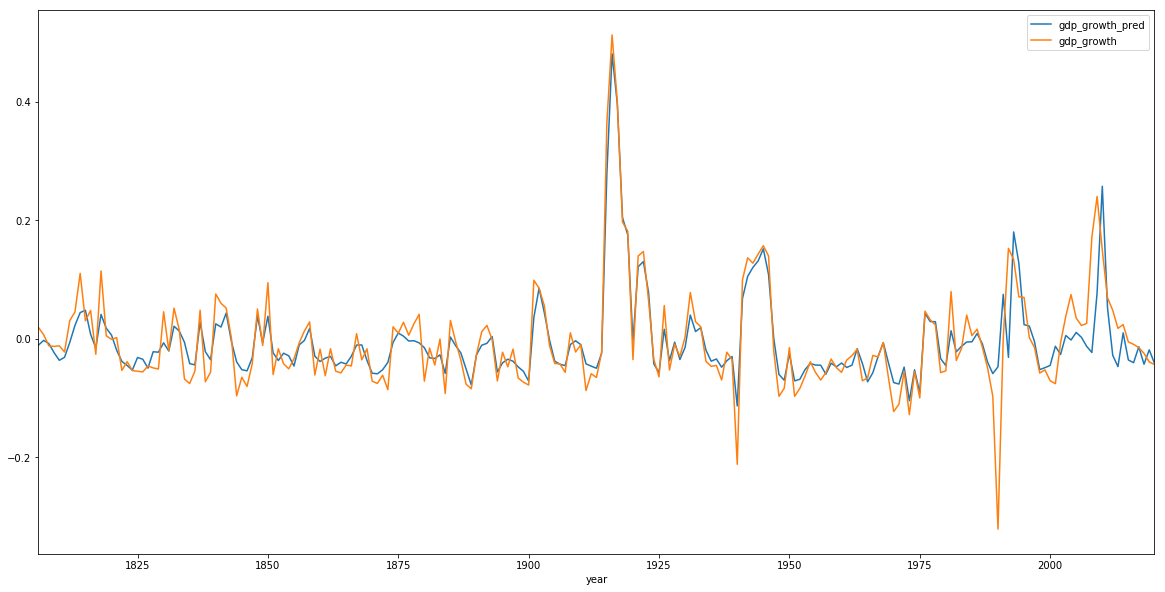

In [56]:
df[['year', 'gdp_growth', 'gdp_growth_pred']].plot(x='year', y=['gdp_growth_pred', 'gdp_growth'])

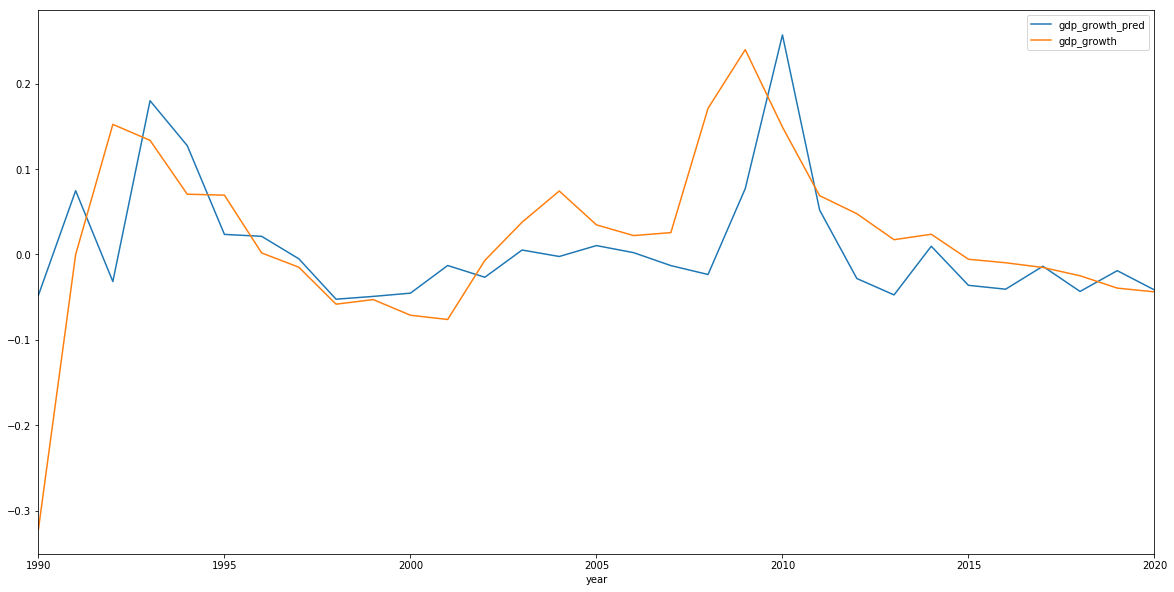

In [57]:
test_df[['year', 'gdp_growth', 'gdp_growth_pred']].plot(x='year', y=['gdp_growth_pred', 'gdp_growth'])

## Gotchas with Trees

    -- Do not capture linear relationships
    -- Time series is not inherent. So need to input Time series flavour forcefully
    -- Work wonderfully for structured data
    -- One hot encoding is mandatory (ordinality is assumed)